# Machine Learning (ML) Project By:

**Name: Raj C. Mhatre**

**Email id :rmhatre404@gmail.com (mailto:rmhatre404@gmail.com) , contact No.: +91-9768877272**

**Linkedin ID: https://www.linkedin.com/in/raj-c-mhatre-571b67219/**

# Cardiac Risk Assessment (CRA):

In [1]:
#Importing all the required libraries:

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report, accuracy_score

**EDA and Visualisation:**

In [2]:
#Creating a path:

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

In [3]:
#Read path and converted into csv:

df = pd.read_csv(url, header=None)
df.head()

0    1    2      3      4    5    6      7    8    9    10   11   12  13
0  63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0   0
1  67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0   2
2  67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0   1
3  37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0  3.5  3.0  0.0  3.0   0
4  41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0  1.4  1.0  0.0  3.0   0

In [4]:
#Naming a attrtibutes: 

columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
df.columns = columns

In [5]:
#Read the csv format data in Jupyter GUI:

df

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   
302  38.0  1.0  3.0     138.0  175.0  0.0      0.0    173.0    0.0      0.0   

     slope   ca thal  target  
0      3.0  0.0  6.0       0  
1      2.0  3.0  3.0       2  
2      2.0  2.0  7.0       1  
3      3.0  0.0  3.0       0  
4      1.0  0.0  3.0       0  
..     ...  ...  ...     ...  
298    2.0  0.0  7.0       1  
299    2.0  2.0  7.0       2  
300    2.0  1.0  7.0       3  
301    2.0  1.0  3.0       1  
302    1.0    ?  3.0       0  

[303 rows x 14 columns]

**Data cleaning & Preprocessing :**

In [6]:
#Read Top5 data: 

df.head()

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       2  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0

In [7]:
#Read Bottom5 data:

df.tail()

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   
302  38.0  1.0  3.0     138.0  175.0  0.0      0.0    173.0    0.0      0.0   

     slope   ca thal  target  
298    2.0  0.0  7.0       1  
299    2.0  2.0  7.0       2  
300    2.0  1.0  7.0       3  
301    2.0  1.0  3.0       1  
302    1.0    ?  3.0       0

In [8]:
#Fetchings the data by using all the basic functions:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [9]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope      target  
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000  
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.937294  
std      0.994971   22.875003    0.469794    1.161075    0.616226    1.228536  
min      0.000000   71.000000    0.000000    0.000000    1.000000    0.000000  
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000  
50%      1.000000  153.000000    0.000000    0.800000    2.000000    0.000000  
75%      2.000000  166.000000    1.000000    1.600000    2.000000    2.000000  
max      2.000000  202.000000    1.000000    6.200000    3.000000    4.000000

In [10]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [11]:
df.shape

(303, 14)

In [12]:
#Finding a missing values:

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
#Finding the unique characters from attributes:

df["ca"].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [14]:
df["thal"].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [15]:
for i in df["ca"]:
    if not(i.isdigit()):
        print(i,end="")

0.03.02.00.00.00.02.00.01.00.00.00.01.00.00.00.00.00.00.00.00.00.00.02.02.00.00.00.00.00.02.02.00.00.00.00.00.01.01.00.03.00.02.00.00.01.00.00.01.00.01.00.01.00.01.01.01.00.01.01.00.00.03.00.01.02.00.00.00.00.00.02.02.02.01.00.01.01.00.00.00.00.00.00.00.00.00.00.00.00.00.03.03.00.00.01.01.02.01.00.00.00.01.01.03.00.01.01.01.00.00.01.00.00.01.00.00.00.03.01.02.03.00.00.01.00.02.01.00.00.00.01.00.00.00.00.00.01.00.00.00.00.00.00.00.00.03.00.00.01.00.00.00.01.01.03.00.02.02.01.00.03.00.00.02.00.0?1.00.00.01.00.00.00.02.01.03.01.01.03.00.02.02.00.00.02.00.03.01.03.00.03.0?3.00.02.01.00.00.00.00.00.01.00.00.03.02.00.00.00.00.00.00.02.01.00.00.00.02.00.00.00.00.02.02.00.00.01.01.01.00.00.03.01.01.02.00.00.00.00.00.00.00.02.00.00.01.01.02.00.00.01.01.00.00.00.02.00.00.00.01.02.00.00.01.00.00.01.00.00.01.00.02.00.02.00.01.00.01.00.01.00.01.00.01.03.02.0?0.00.00.00.00.02.00.00.02.00.00.02.01.01.0?

In [16]:
for i in df["thal"]:
    if not(i.isdigit()):
        print(i,end="")

6.03.07.03.03.03.03.03.07.07.06.03.06.07.07.03.07.03.03.03.03.03.03.07.07.03.03.03.03.07.03.07.03.07.03.03.07.06.07.03.07.07.03.03.03.07.03.07.03.03.03.07.03.03.07.07.07.07.03.03.07.03.07.03.07.07.03.07.07.03.03.07.07.06.03.03.07.03.03.07.03.03.03.07.03.03.03.0?3.03.03.07.07.03.03.07.07.07.03.03.03.03.03.03.07.07.07.07.07.07.07.03.06.07.07.06.03.03.07.07.07.07.03.07.03.03.07.07.03.03.07.07.03.03.03.03.07.07.07.03.03.07.03.07.07.03.07.03.03.03.07.03.07.07.03.03.07.07.07.07.07.03.03.03.03.07.03.03.07.03.07.07.03.03.06.07.07.06.03.03.07.07.03.07.03.03.07.06.07.07.03.07.07.03.03.03.03.03.03.03.03.03.07.07.07.07.07.07.03.03.03.07.03.07.03.07.03.03.03.03.03.03.03.07.03.03.03.03.03.03.03.03.03.03.03.03.07.07.03.03.03.03.03.03.03.03.07.03.07.03.06.07.07.03.03.03.03.03.03.07.03.03.03.03.03.06.0?6.07.03.07.06.07.03.03.07.03.03.03.03.07.03.07.03.07.06.06.07.07.03.07.03.06.07.03.03.06.07.07.07.07.03.03.0

In [17]:
#Replacing "?" with Null:

df["ca"].replace("?",np.nan,inplace=True)
df["thal"].replace("?",np.nan,inplace=True)

<AxesSubplot:>

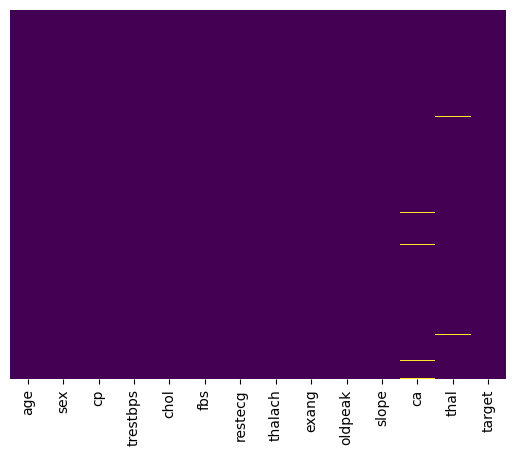

In [18]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [19]:
#Drop rows where data is missing:

df.dropna(inplace=True)

<AxesSubplot:>

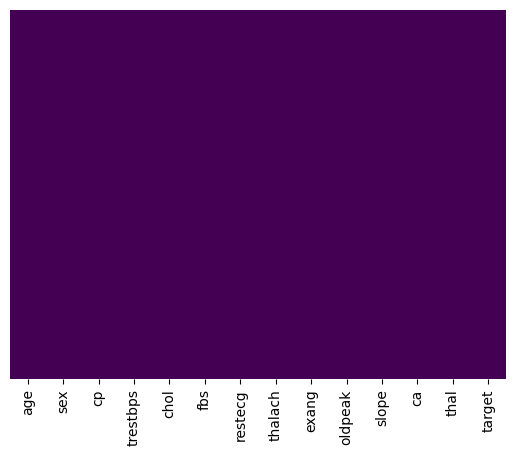

In [20]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    object 
 12  thal      297 non-null    object 
 13  target    297 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 34.8+ KB


In [22]:
#Converting datatype of attributes float to int:

df['ca'] = pd.to_numeric(df['ca'], errors='coerce')
df['thal'] = pd.to_numeric(df['thal'], errors='coerce')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  target    297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB


In [24]:
df.shape

(297, 14)

In [25]:
df

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
297  57.0  0.0  4.0     140.0  241.0  0.0      0.0    123.0    1.0      0.2   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   

     slope   ca  thal  target  
0      3.0  0.0   6.0       0  
1      2.0  3.0   3.0       2  
2      2.0  2.0   7.0       1  
3      3.0  0.0   3.0       0  
4      1.0  0.0   3.0       0  
..     ...  ...   ...     ...  
297    2.0  0.0   7.0       1  
298    2.0  0.0   7.0       1  
299    2.0  2.0   7.0       2  
300    2.0  1.0   7.0       3  
301    2.0  1.0   3.0       1  

[297 rows x 14 columns]

In [26]:
df.corr()

age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.092399  0.110471  0.290476  0.202644  0.132062   
sex      -0.092399  1.000000  0.008908 -0.066340 -0.198089  0.038850   
cp        0.110471  0.008908  1.000000 -0.036980  0.072088 -0.057663   
trestbps  0.290476 -0.066340 -0.036980  1.000000  0.131536  0.180860   
chol      0.202644 -0.198089  0.072088  0.131536  1.000000  0.012708   
fbs       0.132062  0.038850 -0.057663  0.180860  0.012708  1.000000   
restecg   0.149917  0.033897  0.063905  0.149242  0.165046  0.068831   
thalach  -0.394563 -0.060496 -0.339308 -0.049108 -0.000075 -0.007842   
exang     0.096489  0.143581  0.377525  0.066691  0.059339 -0.000893   
oldpeak   0.197123  0.106567  0.203244  0.191243  0.038596  0.008311   
slope     0.159405  0.033345  0.151079  0.121172 -0.009215  0.047819   
ca        0.362210  0.091925  0.235644  0.097954  0.115945  0.152086   
thal      0.126586  0.383652  0.268500  0.138183  0.010859  0.062209   
target    0.222156  0.226797  0.404248  0.159620  0.066448  0.049040   

           restecg   thalach     exang   oldpeak     slope        ca  \
age       0.149917 -0.394563  0.096489  0.197123  0.159405  0.362210   
sex       0.033897 -0.060496  0.143581  0.106567  0.033345  0.091925   
cp        0.063905 -0.339308  0.377525  0.203244  0.151079  0.235644   
trestbps  0.149242 -0.049108  0.066691  0.191243  0.121172  0.097954   
chol      0.165046 -0.000075  0.059339  0.038596 -0.009215  0.115945   
fbs       0.068831 -0.007842 -0.000893  0.008311  0.047819  0.152086   
restecg   1.000000 -0.072290  0.081874  0.113726  0.135141  0.129021   
thalach  -0.072290  1.000000 -0.384368 -0.347640 -0.389307 -0.268727   
exang     0.081874 -0.384368  1.000000  0.289310  0.250572  0.148232   
oldpeak   0.113726 -0.347640  0.289310  1.000000  0.579037  0.294452   
slope     0.135141 -0.389307  0.250572  0.579037  1.000000  0.109761   
ca        0.129021 -0.268727  0.148232  0.294452  0.109761  1.000000   
thal      0.018795 -0.274831  0.326927  0.344976  0.279688  0.256382   
target    0.184136 -0.420639  0.391613  0.501461  0.374689  0.521178   

              thal    target  
age       0.126586  0.222156  
sex       0.383652  0.226797  
cp        0.268500  0.404248  
trestbps  0.138183  0.159620  
chol      0.010859  0.066448  
fbs       0.062209  0.049040  
restecg   0.018795  0.184136  
thalach  -0.274831 -0.420639  
exang     0.326927  0.391613  
oldpeak   0.344976  0.501461  
slope     0.279688  0.374689  
ca        0.256382  0.521178  
thal      1.000000  0.513377  
target    0.513377  1.000000

**Visualization:**

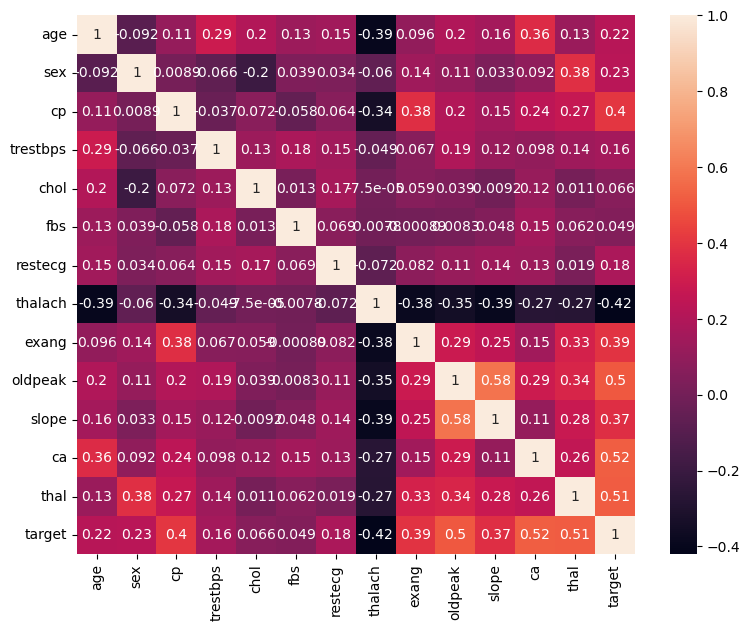

In [27]:
#Basic heatmap:

plt.figure(figsize=(9,7))
sns.heatmap(df.corr(), annot=True)
plt.show()

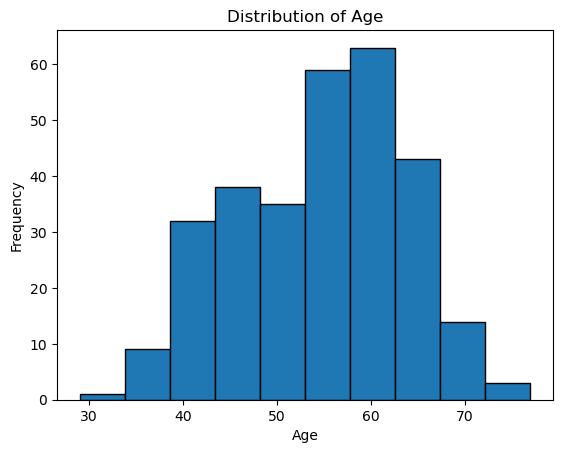

In [28]:
#Histogram of Age Distribution:

plt.hist(df['age'], bins=10, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

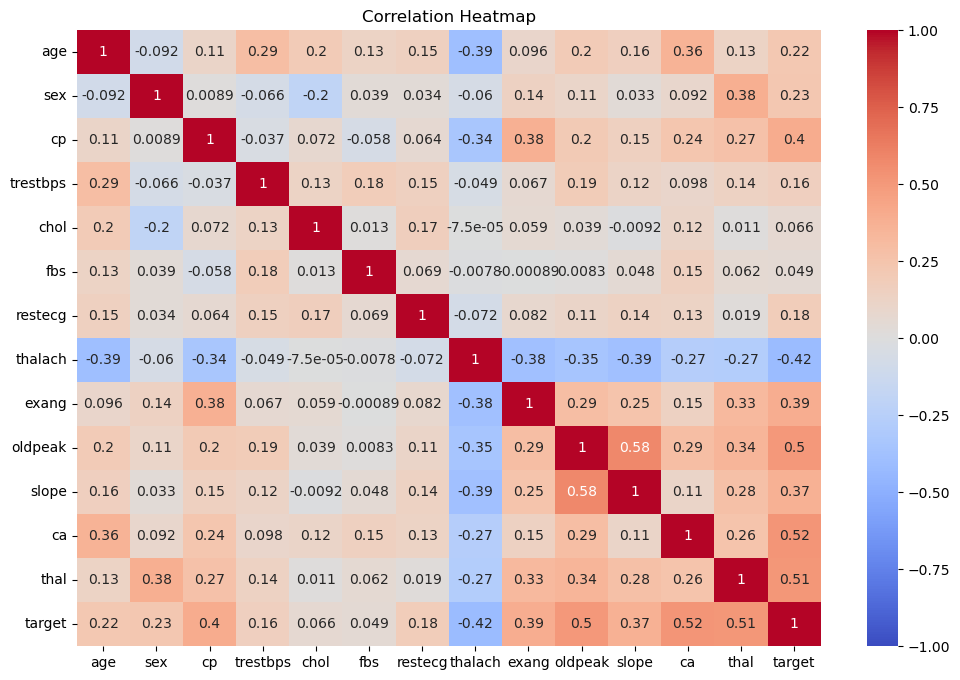

In [29]:
#Correlation Heatmap:

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

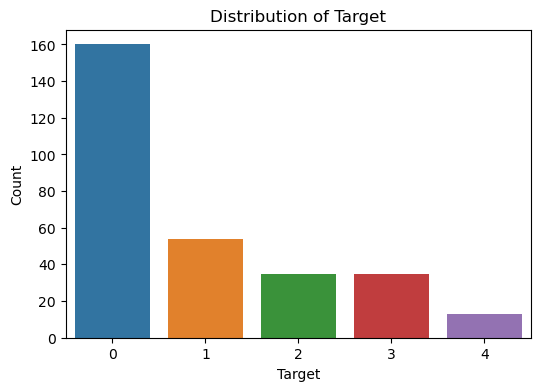

In [30]:
#Barplot of Target Variable:
    
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Target')
plt.show()

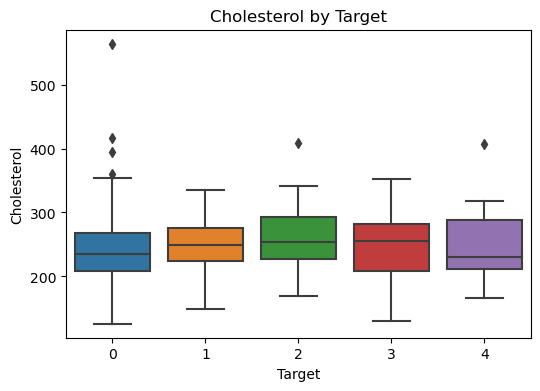

In [31]:
#Boxplot of Cholesterol by Target Variable:

plt.figure(figsize=(6,4))
sns.boxplot(x='target', y='chol', data=df)
plt.xlabel('Target')
plt.ylabel('Cholesterol')
plt.title('Cholesterol by Target')
plt.show()

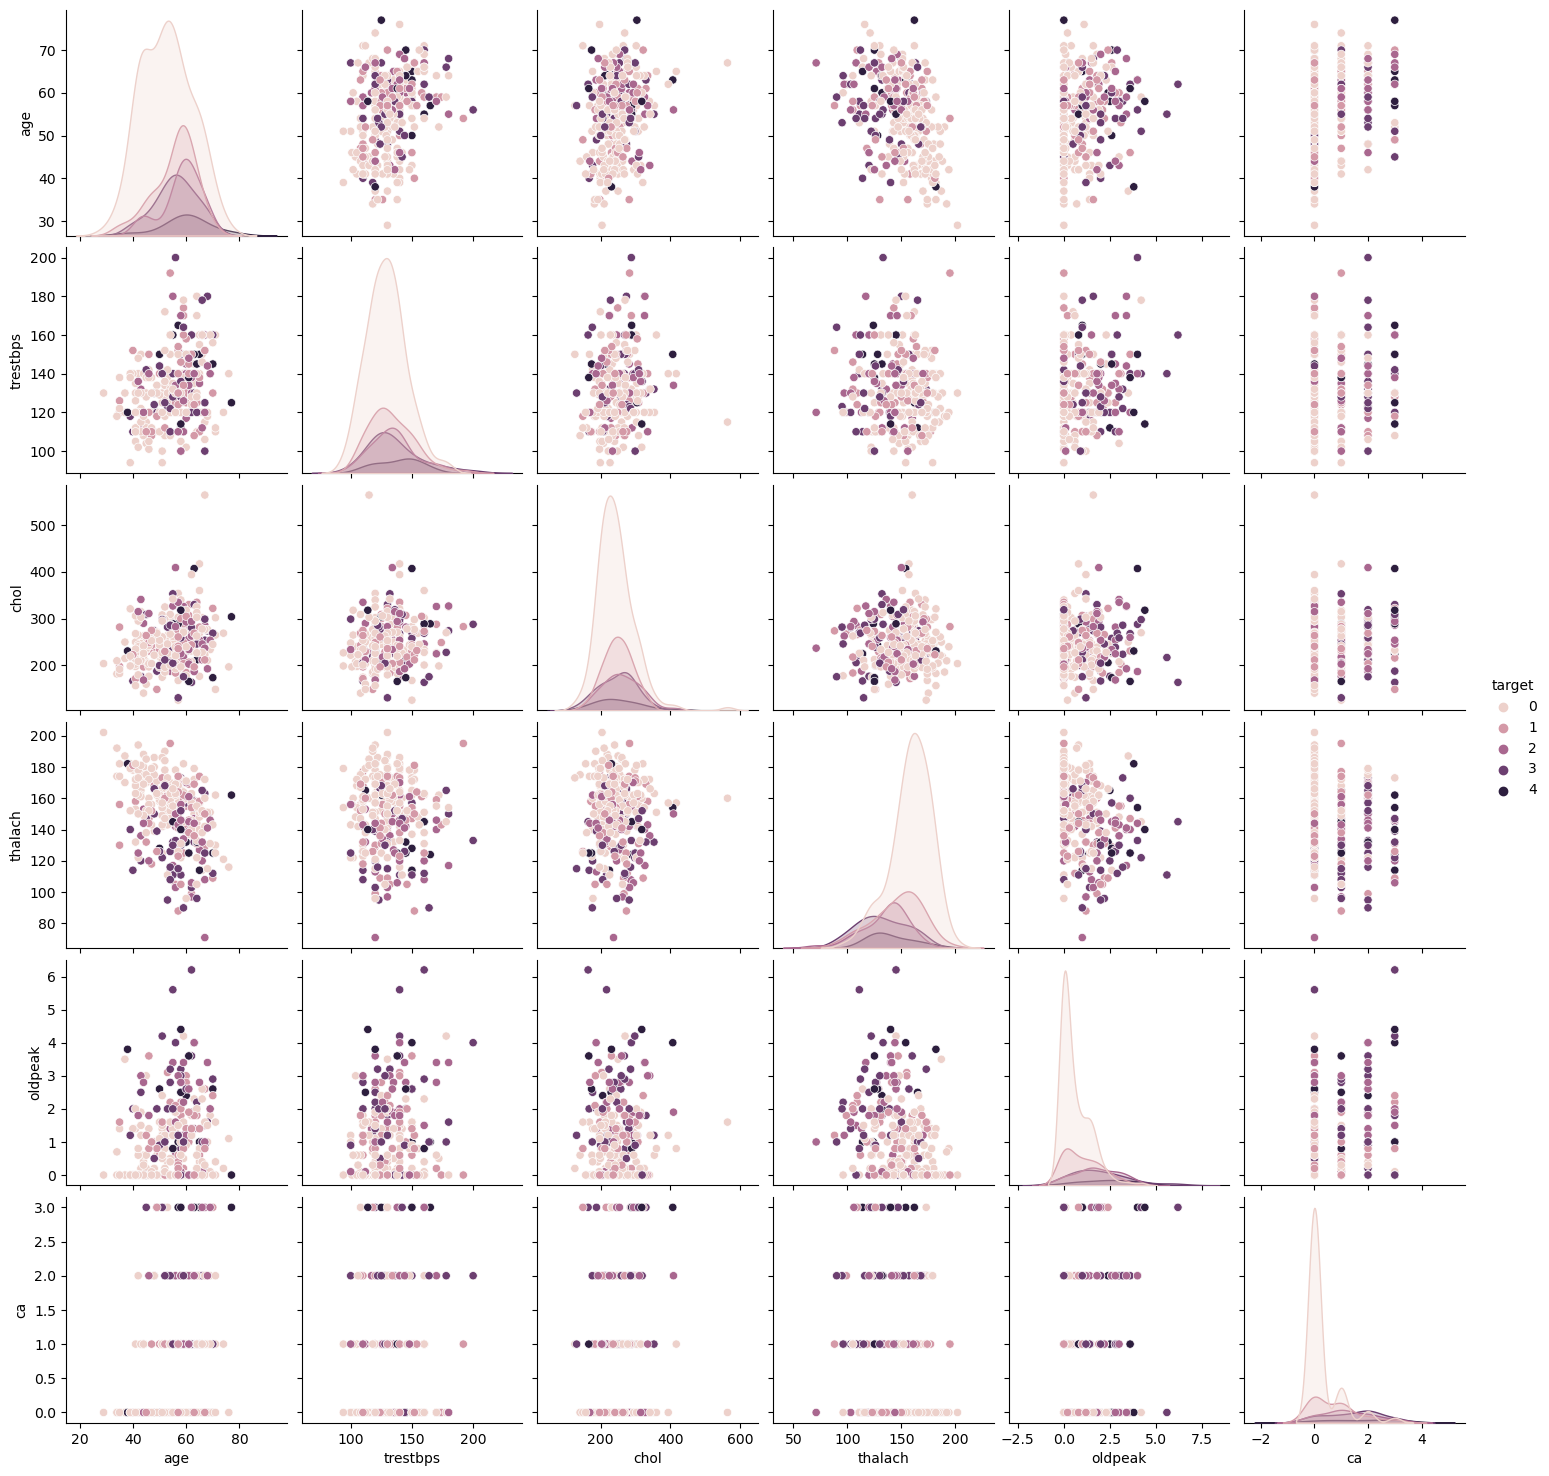

In [32]:
#Pairplot of Selected Features:

sns.pairplot(data=df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'target']], hue='target')
plt.show()

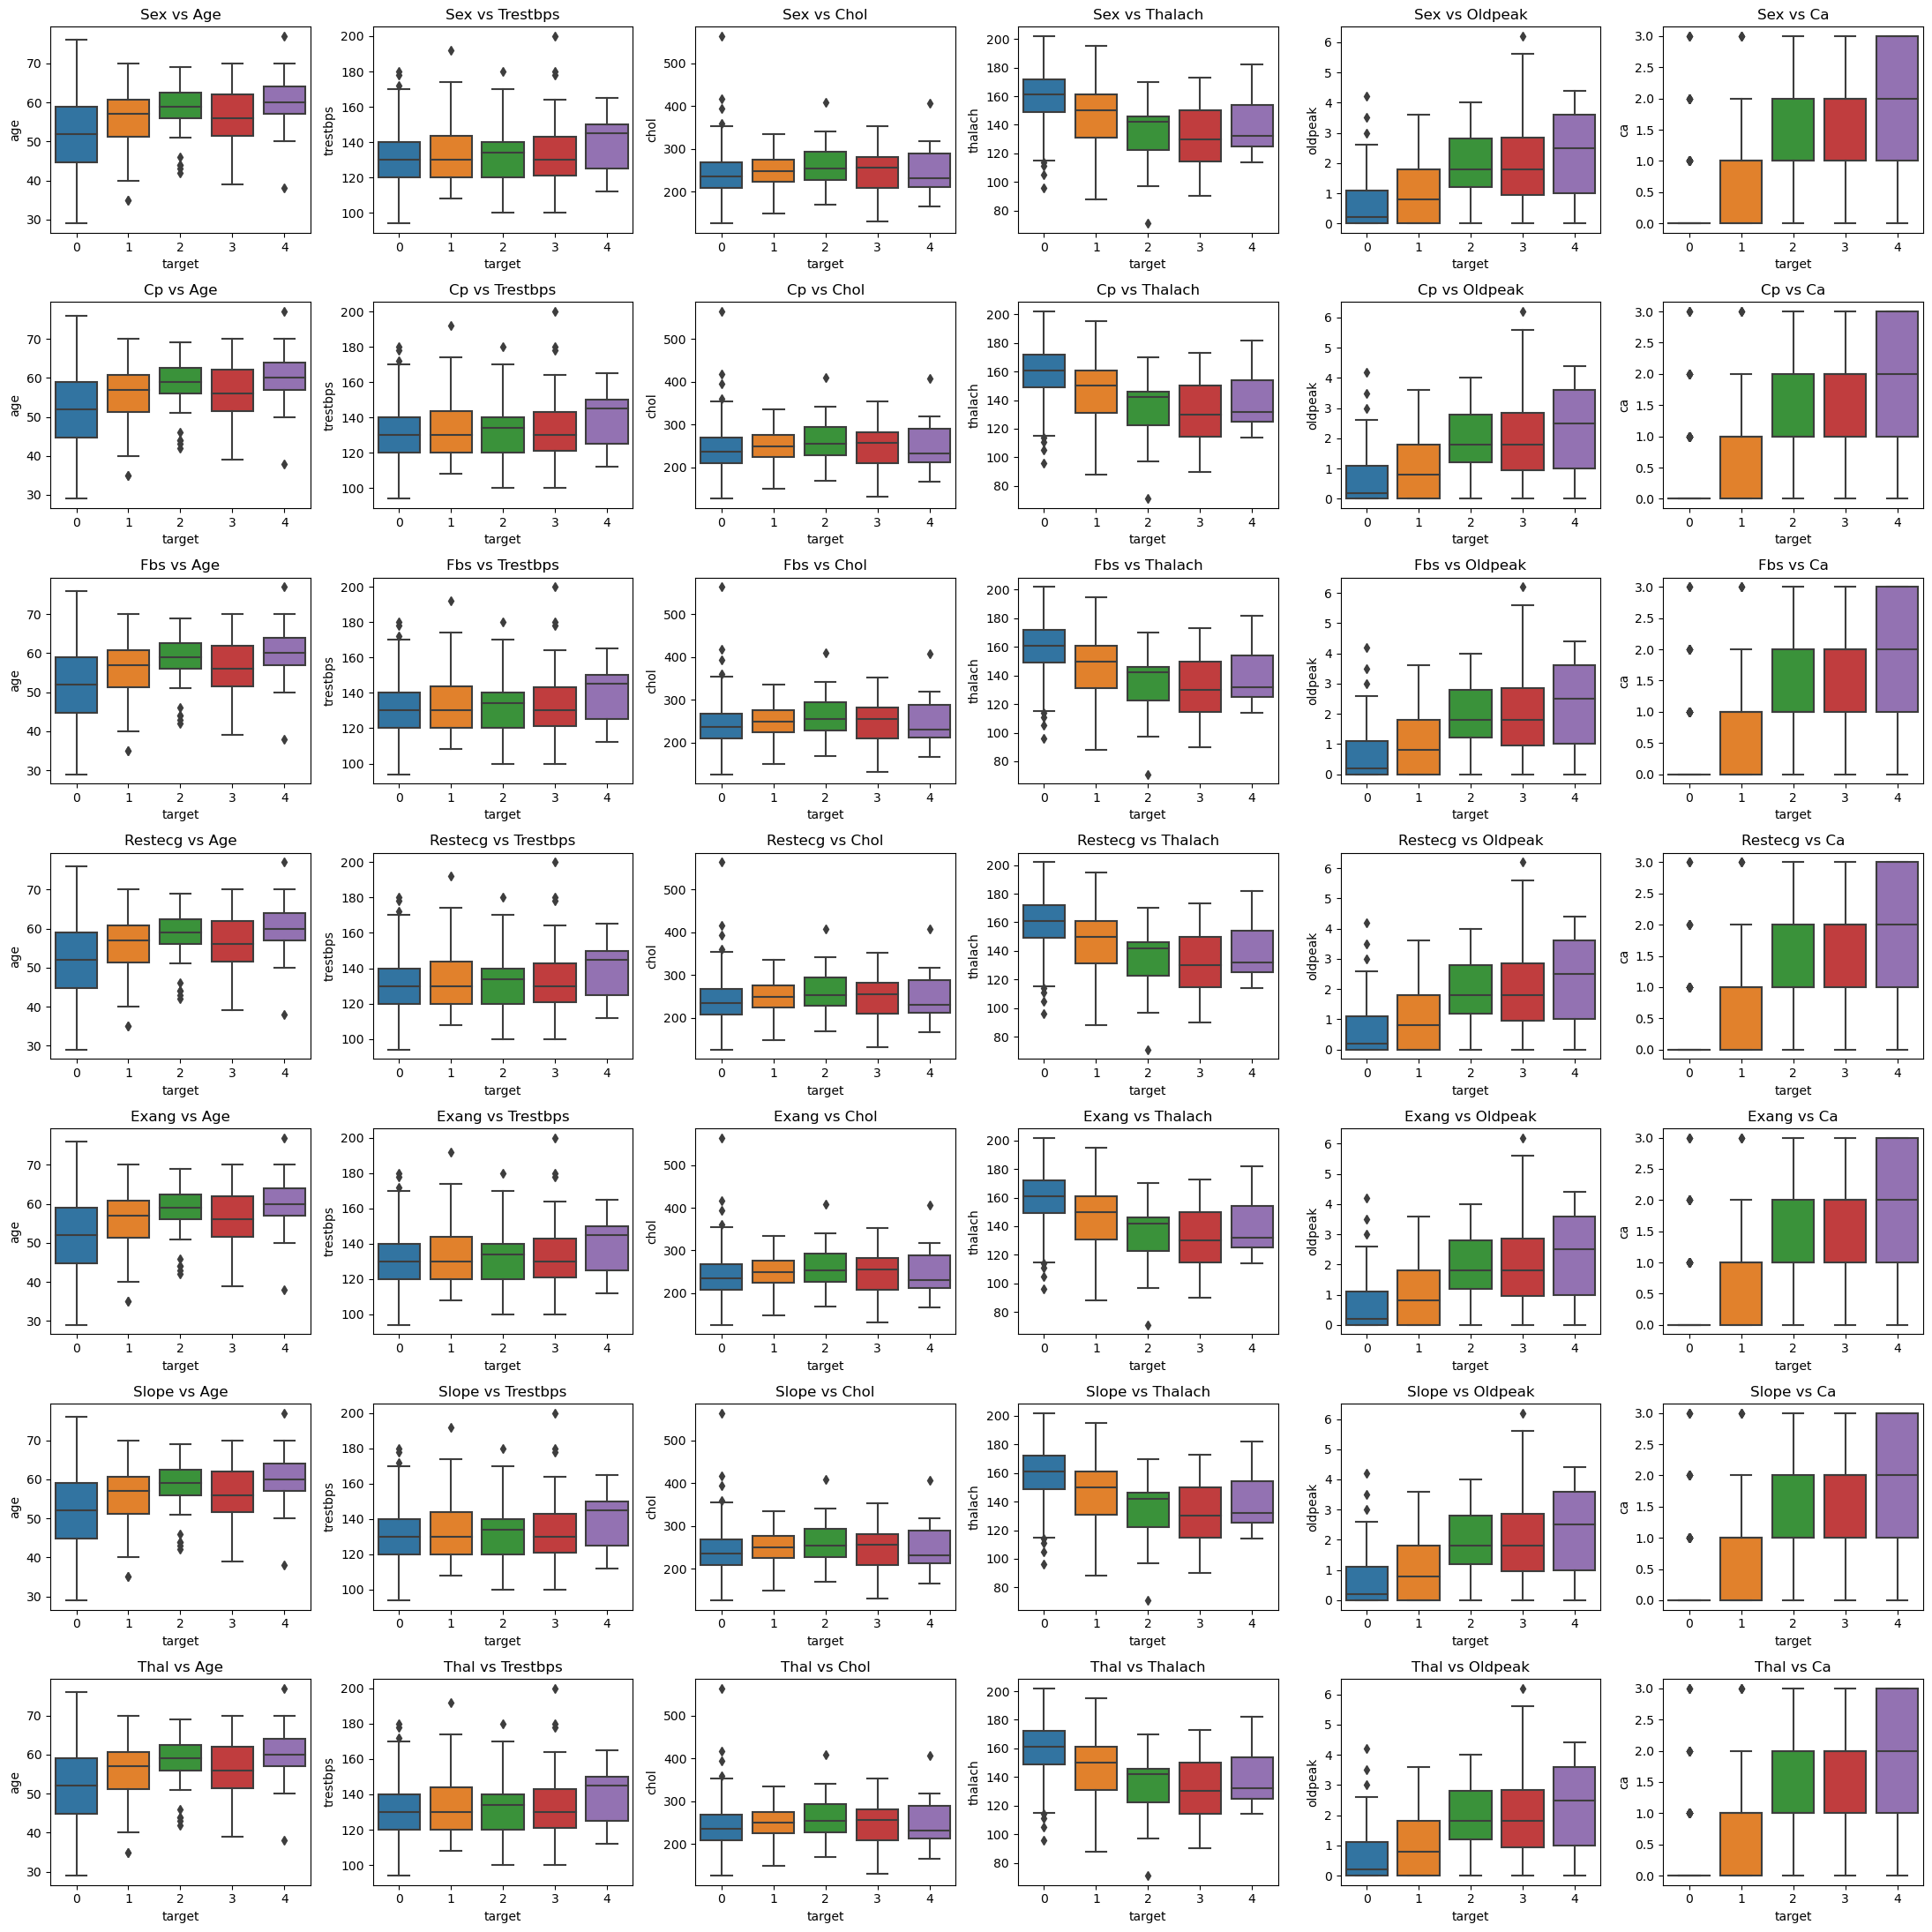

In [33]:
# Visualize the data with boxplots:

cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
rows = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
fig, axs = plt.subplots(nrows=len(rows), ncols=len(cols), figsize=(22, 22))
for row in range(len(rows)):
    for col in range(len(cols)):
        sns.boxplot(x='target', y=cols[col], data=df, ax=axs[row, col])
        axs[row, col].set_title(f"{rows[row].title()} vs {cols[col].title()}")

plt.tight_layout()
plt.show()

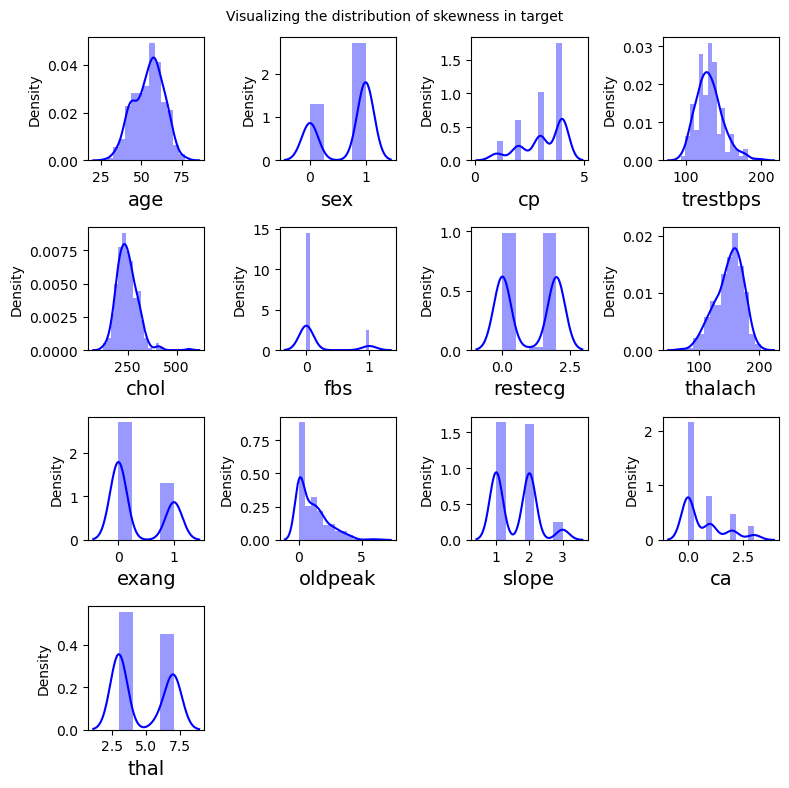

In [34]:
#We will see the skewness of all the numerical columns in our dataset by a distplot:

plt.figure(figsize=(8,8))
plt.suptitle("Visualizing the distribution of skewness in target",fontsize=10)
plotnumber=1
for column in df:
    if plotnumber<=13:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[column],color="blue")
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()

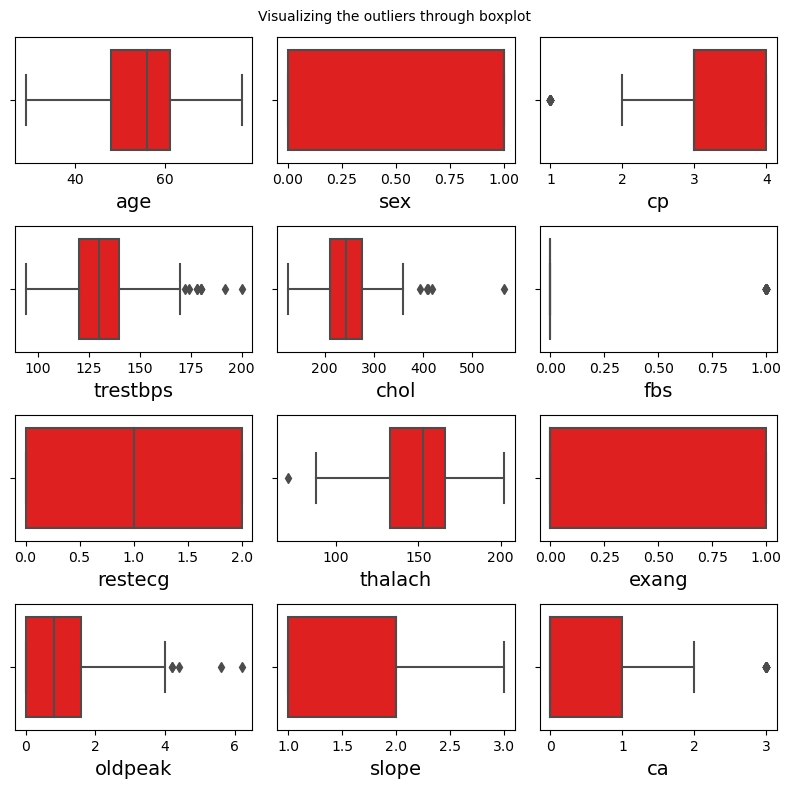

In [35]:
#We will now see the Outliers present in our Numerical columns through Boxplot:

plt.figure(figsize=(8,8))
plt.suptitle("Visualizing the outliers through boxplot",fontsize=10)
plotnumber=1
for column in df:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(df[column],color="red")
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()

# Creating a ML Model:

**Data Preprocessing :**

In [36]:
#Coverted Multi-class to Binary-class like YES or NO:

def multi_to_bin(n):
    if n>=1:
        return 1
    else:
        return 0

**Creating a new column:**

In [37]:
df["target_new"]=df["target"].apply(multi_to_bin)
df["target_new"].value_counts()

0    160
1    137
Name: target_new, dtype: int64

In [38]:
df

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
297  57.0  0.0  4.0     140.0  241.0  0.0      0.0    123.0    1.0      0.2   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   

     slope   ca  thal  target  target_new  
0      3.0  0.0   6.0       0           0  
1      2.0  3.0   3.0       2           1  
2      2.0  2.0   7.0       1           1  
3      3.0  0.0   3.0       0           0  
4      1.0  0.0   3.0       0           0  
..     ...  ...   ...     ...         ...  
297    2.0  0.0   7.0       1           1  
298    2.0  0.0   7.0       1           1  
299    2.0  2.0   7.0       2           1  
300    2.0  1.0   7.0       3           1  
301    2.0  1.0   3.0       1           1  

[297 rows x 15 columns]

In [39]:
#Feature Engineering:

x=df.iloc[:,:-2]
y=df.iloc[:,-1]

In [40]:
x

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
297  57.0  0.0  4.0     140.0  241.0  0.0      0.0    123.0    1.0      0.2   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   

     slope   ca  thal  
0      3.0  0.0   6.0  
1      2.0  3.0   3.0  
2      2.0  2.0   7.0  
3      3.0  0.0   3.0  
4      1.0  0.0   3.0  
..     ...  ...   ...  
297    2.0  0.0   7.0  
298    2.0  0.0   7.0  
299    2.0  2.0   7.0  
300    2.0  1.0   7.0  
301    2.0  1.0   3.0  

[297 rows x 13 columns]

In [41]:
y

0      0
1      1
2      1
3      0
4      0
      ..
297    1
298    1
299    1
300    1
301    1
Name: target_new, Length: 297, dtype: int64

In [42]:
#Splitting the dataset into training and testing data:

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=3)

In [43]:
# Scale the numerical features
scaler = StandardScaler()
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
xtrain[num_cols] = scaler.fit_transform(xtrain[num_cols])
xtest[num_cols] = scaler.transform(xtest[num_cols])

In [44]:
xtrain

age  sex   cp  trestbps      chol  fbs  restecg   thalach  exang  \
221 -0.051686  0.0  3.0 -1.363871  0.379844  0.0      2.0  0.807433    0.0   
224  0.920952  0.0  4.0 -1.363871  0.420364  0.0      0.0  0.896312    1.0   
135  0.056385  0.0  2.0  0.198793  0.035430  0.0      2.0  0.540793    0.0   
45   0.380597  1.0  3.0 -1.132365 -0.369764  0.0      2.0  0.718553    0.0   
95  -0.267828  1.0  4.0 -0.206342  0.136728  0.0      0.0  0.540793    1.0   
..        ...  ...  ...       ...       ...  ...      ...       ...    ...   
281 -0.808182  1.0  3.0 -0.090589  0.096209  0.0      0.0  1.340712    0.0   
259  0.272526  1.0  2.0 -0.437848  0.258286  0.0      0.0 -0.348005    0.0   
132 -2.753457  1.0  2.0 -0.090589 -0.896515  0.0      2.0  2.362830    0.0   
252  1.029022  1.0  4.0 -0.206342  0.298806  0.0      0.0 -1.947843    1.0   
153  0.056385  1.0  4.0  1.645704  0.825557  0.0      2.0 -0.170246    1.0   

      oldpeak  slope        ca  thal  
221 -0.875066    1.0 -0.701713   3.0  
224  0.710007    2.0  1.482566   3.0  
135  0.357769    2.0 -0.701713   3.0  
45   1.326425    2.0  0.390427   7.0  
95  -0.875066    1.0  0.390427   7.0  
..        ...    ...       ...   ...  
281 -0.875066    1.0 -0.701713   3.0  
259 -0.610887    1.0 -0.701713   7.0  
132 -0.875066    1.0 -0.701713   3.0  
252 -0.698947    2.0  0.390427   7.0  
153 -0.170589    2.0  0.390427   7.0  

[207 rows x 13 columns]

# Developing Models:

In [45]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    
    train=model.score(xtrain,ytrain)
    test=model.score(xtest,ytest)
    
    print(f"Training Accuracy: {train}\nTesting Accuracy: {test}\n\n")
    print(classification_report(ytest,ypred))
    
    return model

**In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.**

**On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.**

# Gaussian Naive Bayes classifier:

In [46]:
# Train and evaluate a Gaussian Naive Bayes classifier:

nb = GaussianNB()
print("\nGaussian Naive Bayes:")
nb = mymodel(GaussianNB())


Gaussian Naive Bayes:
Training Accuracy: 0.8502415458937198
Testing Accuracy: 0.8555555555555555


              precision    recall  f1-score   support

           0       0.89      0.84      0.87        50
           1       0.81      0.88      0.84        40

    accuracy                           0.86        90
   macro avg       0.85      0.86      0.85        90
weighted avg       0.86      0.86      0.86        90



# Decision Tree classifier:

In [47]:
# Train and evaluate a Decision Tree classifier:

dt = DecisionTreeClassifier()
print("\nDecision Tree:")
dt = mymodel( DecisionTreeClassifier())


Decision Tree:
Training Accuracy: 1.0
Testing Accuracy: 0.8111111111111111


              precision    recall  f1-score   support

           0       0.84      0.82      0.83        50
           1       0.78      0.80      0.79        40

    accuracy                           0.81        90
   macro avg       0.81      0.81      0.81        90
weighted avg       0.81      0.81      0.81        90



# Random Forest classifier:

In [48]:
# Train and evaluate a Random Forest classifier:

rf = RandomForestClassifier()
print("\nRandom Forest:")
rf = mymodel(RandomForestClassifier())


Random Forest:
Training Accuracy: 1.0
Testing Accuracy: 0.8222222222222222


              precision    recall  f1-score   support

           0       0.85      0.82      0.84        50
           1       0.79      0.82      0.80        40

    accuracy                           0.82        90
   macro avg       0.82      0.82      0.82        90
weighted avg       0.82      0.82      0.82        90



# Support Vector Machine Classifier:

In [49]:
# Train and evaluate a support vector machine classifier:

svm = SVC()
print("\nSupport Vector Machine:")
svm = mymodel(SVC())


Support Vector Machine:
Training Accuracy: 0.8454106280193237
Testing Accuracy: 0.8444444444444444


              precision    recall  f1-score   support

           0       0.86      0.86      0.86        50
           1       0.82      0.82      0.82        40

    accuracy                           0.84        90
   macro avg       0.84      0.84      0.84        90
weighted avg       0.84      0.84      0.84        90



# Logistic Regression:

In [50]:
# Train and evaluate a Logistic Regression:

logreg=LogisticRegression()
print("\nLogistic Regression:")
logreg = mymodel(LogisticRegression())


Logistic Regression:
Training Accuracy: 0.8599033816425121
Testing Accuracy: 0.7888888888888889


              precision    recall  f1-score   support

           0       0.83      0.78      0.80        50
           1       0.74      0.80      0.77        40

    accuracy                           0.79        90
   macro avg       0.79      0.79      0.79        90
weighted avg       0.79      0.79      0.79        90



# KNeighbors Classifier:

In [51]:
# Train and evaluate a KNeighbors Classifier:

knn= KNeighborsClassifier()
print("\nKNeighbors Classifier:")
knn = mymodel(KNeighborsClassifier())


KNeighbors Classifier:
Training Accuracy: 0.8309178743961353
Testing Accuracy: 0.8222222222222222


              precision    recall  f1-score   support

           0       0.87      0.80      0.83        50
           1       0.77      0.85      0.81        40

    accuracy                           0.82        90
   macro avg       0.82      0.82      0.82        90
weighted avg       0.83      0.82      0.82        90



# XGB Classifier:

In [52]:
# Train and evaluate a XGB Classifier:

!pip install xgboost
from xgboost import XGBClassifier

xgb =XGBClassifier()
print("\nXGB Classifier:")
xgb = mymodel(XGBClassifier())


XGB Classifier:
Training Accuracy: 1.0
Testing Accuracy: 0.8444444444444444


              precision    recall  f1-score   support

           0       0.88      0.84      0.86        50
           1       0.81      0.85      0.83        40

    accuracy                           0.84        90
   macro avg       0.84      0.84      0.84        90
weighted avg       0.85      0.84      0.84        90



In [53]:
xgb = mymodel(XGBClassifier(max_depth=2))

Training Accuracy: 0.9903381642512077
Testing Accuracy: 0.8111111111111111


              precision    recall  f1-score   support

           0       0.84      0.82      0.83        50
           1       0.78      0.80      0.79        40

    accuracy                           0.81        90
   macro avg       0.81      0.81      0.81        90
weighted avg       0.81      0.81      0.81        90



# Cross Validation Score:

In [54]:
from sklearn.model_selection import cross_val_score

In [55]:
# Define the models:

models = [('Log.Regression',LogisticRegression()),
          ('G.NaiveBayes', GaussianNB()),
          ('Decision Tree', DecisionTreeClassifier()),
          ('Random Forest', RandomForestClassifier()),
          ('XGBClassifier1', XGBClassifier()),
          ('XGBClassifier2', XGBClassifier(max_depth=2)),
          ('SVM          ', SVC()),
          ('K-NNClassifier',KNeighborsClassifier()),
          ]


In [56]:
# Evaluate each model using 5-fold cross-validation:

results = []
for name, model in models:
    scores = cross_val_score(model, x, y, cv=5)
    results.append((name, scores.mean(), scores.std()))

In [57]:
# Print the results:

print("Model\t\t\tAccuracy\tStandard deviation")
print("--------------------------------------------------------")
for name, mean, std in results:
    print(f"{name}\t\t{mean:.4f}\t\t{std:.4f}")

Model			Accuracy	Standard deviation
--------------------------------------------------------
Log.Regression		0.8347		0.0385
G.NaiveBayes		0.8349		0.0474
Decision Tree		0.7506		0.0622
Random Forest		0.8111		0.0404
XGBClassifier1		0.8010		0.0517
XGBClassifier2		0.7909		0.0436
SVM          		0.6737		0.0426
K-NNClassifier		0.6735		0.0522


In [58]:
from sklearn.model_selection import KFold, cross_val_score

clf = RandomForestClassifier(random_state=1)

k_folds = KFold(n_splits = 5)

scores = cross_val_score(clf, x, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.81666667 0.93333333 0.81355932 0.76271186 0.74576271]
Average CV Score:  0.8144067796610169
Number of CV Scores used in Average:  5


In [59]:
model_1 = RandomForestClassifier(random_state=1)

model_1.fit(xtrain, ytrain)
ypred = model_1.predict(xtest)

train = model_1.score(xtrain, ytrain)
test = model_1.score(xtest, ytest)

print(f"Training Accuracy : {train}\nTesting Accuracy : {test}\n\n")
print(classification_report(ytest, ypred))


Training Accuracy : 1.0
Testing Accuracy : 0.8444444444444444


              precision    recall  f1-score   support

           0       0.86      0.86      0.86        50
           1       0.82      0.82      0.82        40

    accuracy                           0.84        90
   macro avg       0.84      0.84      0.84        90
weighted avg       0.84      0.84      0.84        90



model AUC score: 0.8424999999999999


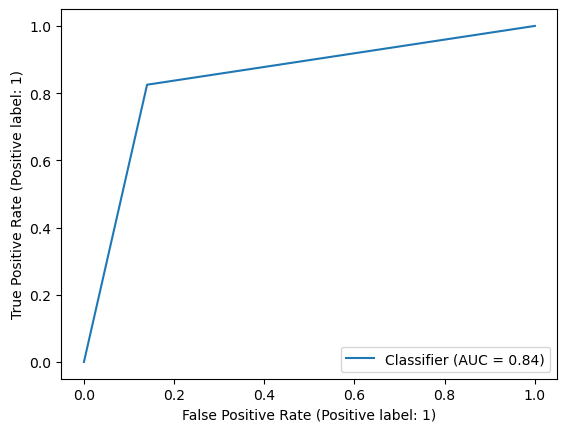

In [60]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(ytest, ypred)
print(f'model AUC score: {roc_auc_score(ytest, ypred)}')

In [61]:

from sklearn.model_selection import KFold, cross_val_score

clf = XGBClassifier(random_state=1)

k_folds = KFold(n_splits = 5)

scores = cross_val_score(clf, x, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.8        0.85       0.77966102 0.76271186 0.74576271]
Average CV Score:  0.7876271186440678
Number of CV Scores used in Average:  5


In [62]:
model_2 = XGBClassifier(random_state=1)

model_2.fit(xtrain, ytrain)
ypred = model_2.predict(xtest)

train = model_2.score(xtrain, ytrain)
test = model_2.score(xtest, ytest)

print(f"Training Accuracy : {train}\nTesting Accuracy : {test}\n\n")
print(classification_report(ytest, ypred))


Training Accuracy : 1.0
Testing Accuracy : 0.8444444444444444


              precision    recall  f1-score   support

           0       0.88      0.84      0.86        50
           1       0.81      0.85      0.83        40

    accuracy                           0.84        90
   macro avg       0.84      0.84      0.84        90
weighted avg       0.85      0.84      0.84        90



model 1 AUC score: 0.845


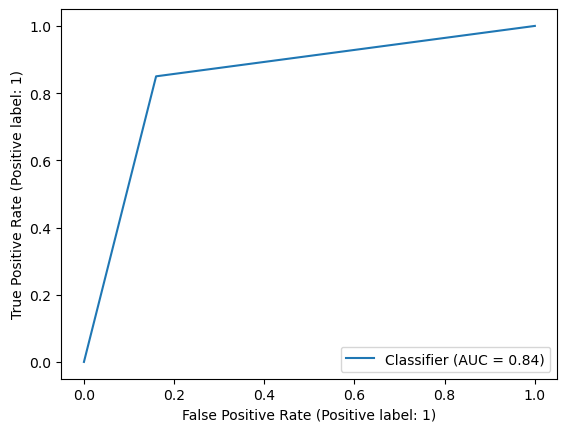

In [63]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(ytest, ypred)
print(f'model 1 AUC score: {roc_auc_score(ytest, ypred)}')

In [64]:
ypred_RF = model_2.predict(xtest)
y_score_RF = model_2.predict_proba(xtest)[:,1]

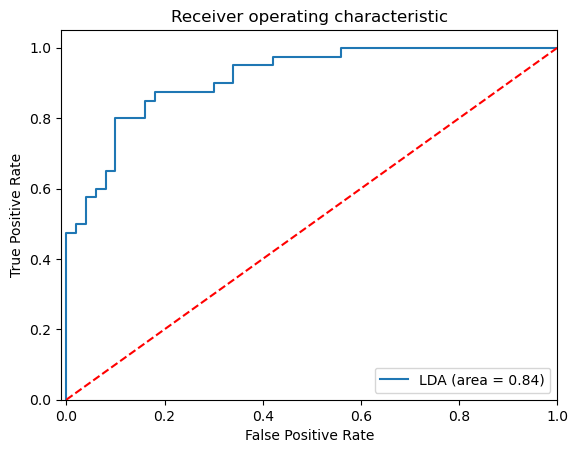

In [65]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_2_roc_auc = roc_auc_score(ytest, model_2.predict(xtest))
fpr, tpr, thresholds = roc_curve(ytest, model_2.predict_proba(xtest)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LDA (area = %0.2f)' % model_2_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()